In [1]:
from pathlib import Path
import os
import pandas as pd

# Initiate findspark instance to run pyspark 
import findspark
findspark.init()

# Importing PySpark
import pyspark 

# Create a spark session 
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

DataFrame[measuredAt: string, lastCalibrationDate: string, equipmentNumber: string, P_x_.Hou_OperatingCPCPump: string, P_x_.Hou_OperatingLastService: string, P_x_.Hou_OperatingRD: string, P_x_.Hou_OperatingRDPump: string, P_x_.Hou_OperatingTotal: string, P_x_.t_TemperaturePND1Set: string, P_x_.t_TemperatureSampleLineSet: string, P_x_.t_TemperatureVPRSet: string, P_x_CPCInletPressureLimit: string, P_x_PND1RelativePressure: string, P_x_PressureAbsolute: string, P_x_RDHeatingSwitch: string, P_x_VPRHeatingSwitch: string, P_x_mn_PNDBypassFlowMin: string, P_x_mx_SystemPressureMax: string, Y_c_DeviceName: string, Y_c_FirmwareVersion: string, Y_r_ChannelFlowCheckResult: string, Y_r_LeakCheckResult: string, Y_r_ResponseCheckResult: string, Y_y_.Hou_NextService: string, Y_y_.U_Voltage1AnalogControllerBoard: string, Y_y_.U_Voltage1AnalogInterfaceBoard: string, Y_y_.U_Voltage1ControllerBoard: string, Y_y_.U_Voltage2AnalogControllerBoard: string, Y_y_.U_Voltage2AnalogInterfaceBoard: string, Y_y_.U_

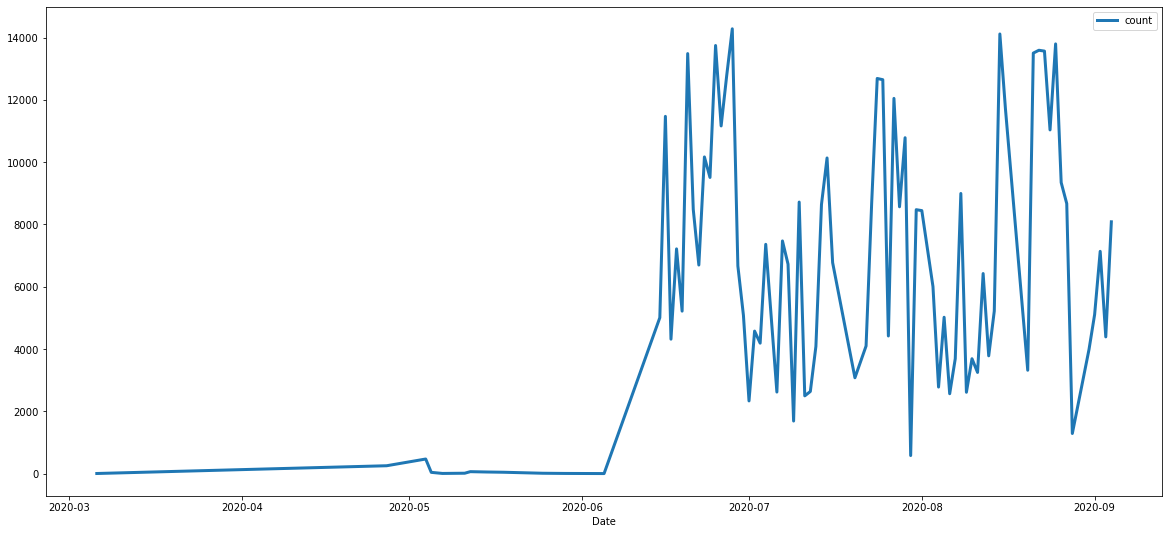

In [110]:
parquetFile_489.printSchema()

In [2]:
final_489 = spark.read.parquet(r'D:\Device_anomaly_new\error_data\APC_Error')
display(final_489)

DataFrame[measuredAt: string, lastCalibrationDate: string, equipmentNumber: string, P_x_.Hou_OperatingCPCPump: string, P_x_.Hou_OperatingLastService: string, P_x_.Hou_OperatingRD: string, P_x_.Hou_OperatingRDPump: string, P_x_.Hou_OperatingTotal: string, P_x_.t_TemperaturePND1Set: string, P_x_.t_TemperatureSampleLineSet: string, P_x_.t_TemperatureVPRSet: string, P_x_CPCInletPressureLimit: string, P_x_PND1RelativePressure: string, P_x_PressureAbsolute: string, P_x_RDHeatingSwitch: string, P_x_VPRHeatingSwitch: string, P_x_mn_PNDBypassFlowMin: string, P_x_mx_SystemPressureMax: string, Y_c_DeviceName: string, Y_c_FirmwareVersion: string, Y_r_ChannelFlowCheckResult: string, Y_r_LeakCheckResult: string, Y_r_ResponseCheckResult: string, Y_y_.Hou_NextService: string, Y_y_.U_Voltage1AnalogControllerBoard: string, Y_y_.U_Voltage1AnalogInterfaceBoard: string, Y_y_.U_Voltage1ControllerBoard: string, Y_y_.U_Voltage2AnalogControllerBoard: string, Y_y_.U_Voltage2AnalogInterfaceBoard: string, Y_y_.U_

In [3]:
final_489.select('Z_y_Error').distinct().count()

50

In [4]:
unique_errors=final_489.groupBy('Z_y_Error').count().orderBy("count").show(60,truncate=False)

+-----------------------------------+-------+
|Z_y_Error                          |count  |
+-----------------------------------+-------+
|20010|00084                        |1      |
|11040|11038|11037                  |1      |
|10012|11040|01237                  |1      |
|11049|01237|01542                  |1      |
|11040|11087|00110|01061|01062|01237|1      |
|21040|10012|11040|01356|01542      |1      |
|11040|21050|00084                  |1      |
|11049|00084|01237                  |2      |
|11040|11049|01237                  |2      |
|20010|10012|11040|00084            |3      |
|11040|01308|01542                  |3      |
|10012|11040|21050|00084            |3      |
|11040|11038                        |3      |
|21050|10012|11040|00084            |4      |
|21034|10012|11040|00084            |6      |
|21050|11040|00084                  |6      |
|21050|10012|00084                  |7      |
|11040|00084                        |14     |
|21050|00084|01237                

In [5]:
final_489_f = final_489.filter(final_489.Z_y_Error.isNotNull())


In [6]:
final_489_ff=final_489_f.filter(final_489.Z_y_Error!='null')


In [7]:
final_489_ff.groupBy('Z_y_Error').count().orderBy("count").show(60,truncate=False)

+-----------------------------------+------+
|Z_y_Error                          |count |
+-----------------------------------+------+
|20010|00084                        |1     |
|10012|11040|01237                  |1     |
|11040|11087|00110|01061|01062|01237|1     |
|11040|21050|00084                  |1     |
|11049|01237|01542                  |1     |
|21040|10012|11040|01356|01542      |1     |
|11040|11038|11037                  |1     |
|11049|00084|01237                  |2     |
|11040|11049|01237                  |2     |
|10012|11040|21050|00084            |3     |
|11040|01308|01542                  |3     |
|11040|11038                        |3     |
|20010|10012|11040|00084            |3     |
|21050|10012|11040|00084            |4     |
|21050|11040|00084                  |6     |
|21034|10012|11040|00084            |6     |
|21050|10012|00084                  |7     |
|11040|00084                        |14    |
|21050|00084|01237                  |22    |
|11039    

In [8]:
from pyspark.sql.functions import split, explode
#splitted_errors=final_489_ff.withColumn('errors',explode(split('Z_y_Error','\|')))

In [9]:
#splitted_errors.select('errors').distinct().count()

In [10]:
#splitted_errors.show(20,truncate=False)

In [11]:
from pyspark.sql.functions import *
final_489_date = final_489_ff.withColumn("Date", date_format("measuredAt", "yyyy-MM-dd"))

In [12]:
df_year = final_489_date.withColumn('year',date_format(col("Date"), "Y"))


In [13]:
df_year = df_year.withColumn('month',date_format(col("Date"), "M"))

In [14]:
df_year = df_year.withColumn('day',date_format(col("Date"), "d"))

In [15]:
splitted_df=df_year.withColumn('errors',explode(split('Z_y_Error','\|')))

In [16]:
unique_errorcodes=splitted_df.groupBy('errors').count().orderBy("count")

In [17]:
unique_errorcodes.show()

+------+-------+
|errors|  count|
+------+-------+
| 01061|      1|
| 21040|      1|
| 01062|      1|
| 11087|      1|
| 00110|      1|
| 01356|      1|
| 20010|      4|
| 21034|      6|
| 21050|     73|
| 11039|    105|
| 11037|    111|
| 00084|    337|
| 11236|   1395|
| 01308|   8874|
| 11038|  16391|
| 01542|  20274|
| 11049| 102997|
| 01237|1006191|
| 10012|1325590|
| 11040|1627414|
+------+-------+



In [18]:
date_graph=splitted_df.groupby('Date').count().orderBy('count',ascending=False)

In [19]:
date_graph1=date_graph.toPandas()

In [20]:
pd.set_option('display.max_rows',None) 
#date_graph1.sortvalues('Date')
date_graph1.sort_values(by=['Date'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

,Date,count
143,2020-03-06,9436
154,2020-04-21,7010
163,2020-04-23,4799
62,2020-04-24,28616
172,2020-04-25,1663
158,2020-04-26,6145
60,2020-04-27,28892
81,2020-04-28,24808
89,2020-04-29,22688
129,2020-04-30,12447


In [21]:
date_graph1['Date'] = pd.to_datetime(date_graph1['Date'])

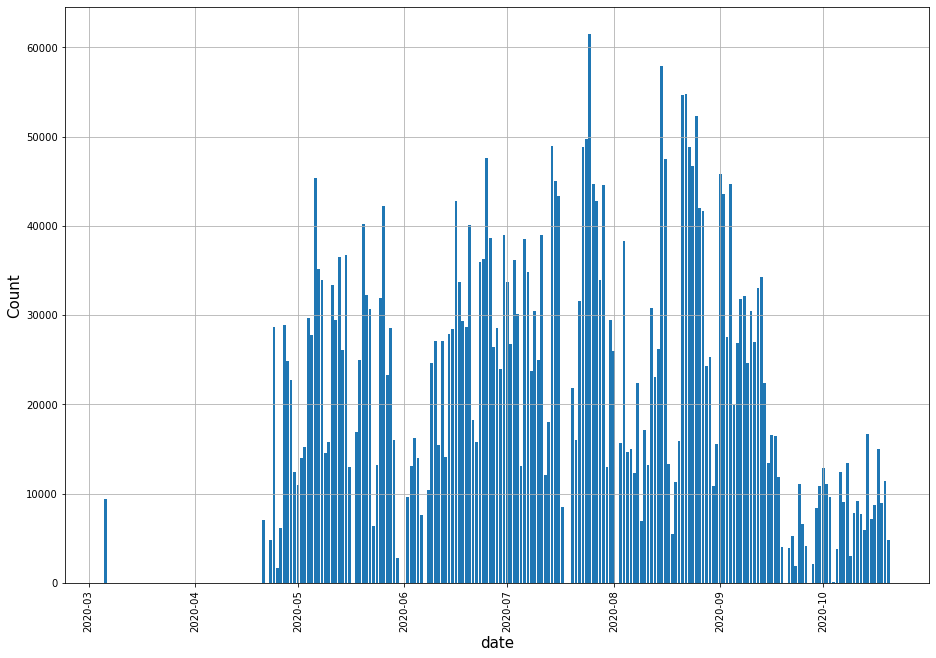

In [22]:
import matplotlib.pyplot as plot
# daywise_data = pd.DataFrame(APC_freq.groupby('date').date.count())
# daywise_data.columns = ["Count"]
# daywise_data=daywise_data.reset_index(['date']) 
fig = plot.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
code = date_graph1['Date']
count = date_graph1['count']
ax.bar(code ,count)
plot.xlabel('date', fontsize=15)
plot.xticks(rotation=90)
plot.ylabel('Count', fontsize=15)
plot.grid(True) 
plot.show() 

In [23]:
equip_graph=splitted_df.groupby('equipmentNumber').count().orderBy('count',ascending=False)

In [24]:
equip_graph1=equip_graph.toPandas()

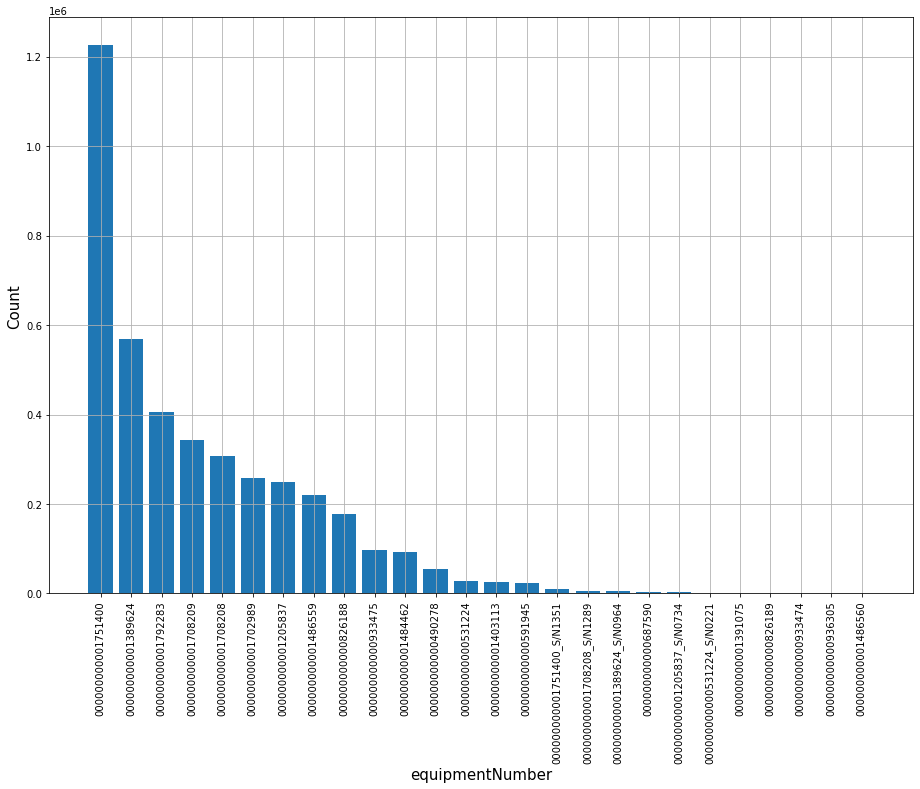

In [25]:
fig = plot.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
code = equip_graph1['equipmentNumber']
count = equip_graph1['count']
ax.bar(code ,count)
plot.xlabel('equipmentNumber', fontsize=15)
plot.xticks(rotation=90)
plot.ylabel('Count', fontsize=15)
plot.grid(True) 
plot.show() 

In [26]:
equipment_1 = splitted_df.filter(splitted_df.equipmentNumber == '000000000001751400')


In [27]:
equipment_1_count=equipment_1.groupBy('errors').count()

In [28]:
equipment_1_count.show()

+------+------+
|errors| count|
+------+------+
| 10012|680836|
| 11049| 20443|
| 21040|     1|
| 01542|  4822|
| 01356|     1|
| 20010|     3|
| 21050|    10|
| 11040|520322|
| 00084|    64|
+------+------+



In [29]:
equipment_1_count1=equipment_1_count.toPandas()

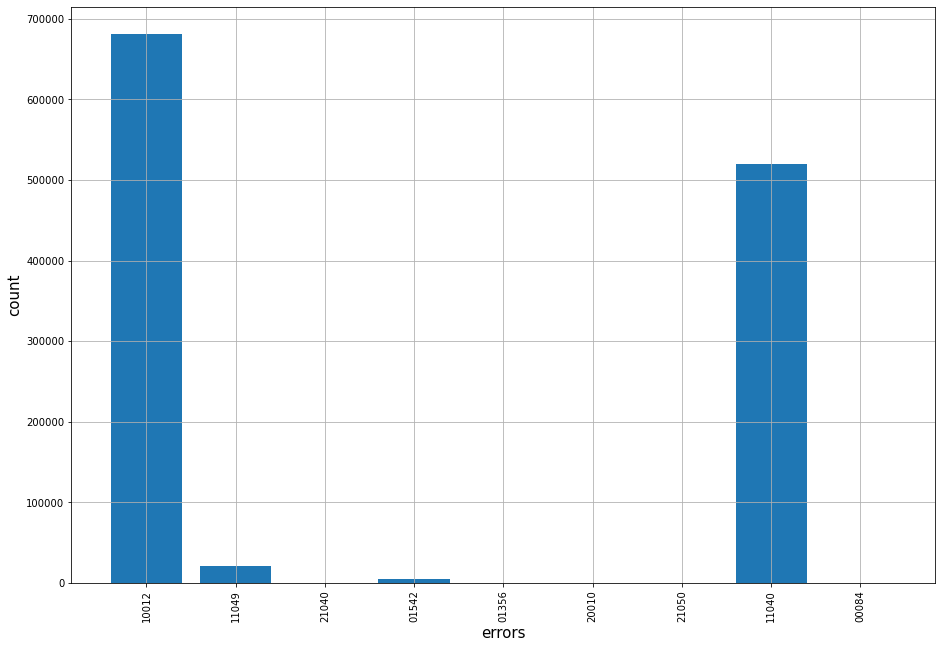

In [30]:
fig = plot.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
code = equipment_1_count1['errors']
count = equipment_1_count1['count']
ax.bar(code ,count)
plot.xlabel('errors', fontsize=15)
plot.xticks(rotation=90)
plot.ylabel('count', fontsize=15)
plot.grid(True) 
plot.show() 

In [77]:
equipment_1_date_count=equipment_1.groupBy('Date','errors').count()

In [86]:
equipment_1_date_count1=equipment_1_date_count.toPandas()

In [87]:
equipment_1_date_count1['Date'] = pd.to_datetime(equipment_1_date_count1['Date']).dt.date

In [34]:
equipment_1_date_count11= equipment_1_date_count1.pivot_table('count',['Date'],'errors') 

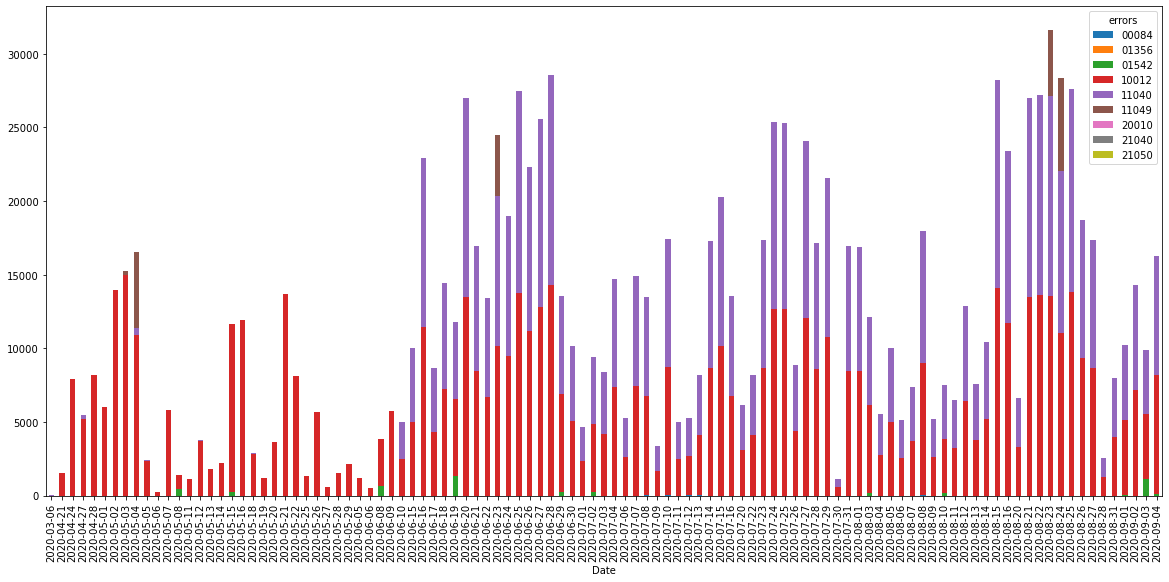

In [35]:
equipment_1_date_count11.plot.bar(stacked=True,figsize=(20,9))

In [36]:
error_description = pd.read_csv(r'D:\Device_Anomaly\data\avl_489_codes_to_channel.csv',sep=';')

In [37]:
error_description

,errorCode,message,channelName,displayName,unit
0,20001,Serial connection (RS232) malfunction,NaN,NaN,NaN
1,20002,Network connetction malfunction,NaN,NaN,NaN
2,20008,Calibration data checksum incorrect,NaN,NaN,NaN
3,20009,Timeout during heating up,Y_y_-t_TemperatureVPR,Temperature Volatile Particle Remover (VPR),°C
4,20009,Timeout during heating up,P_x_-t_TemperatureSampleLineSet,TemperatureSampleLineSet,NaN
5,20009,Timeout during heating up,P_x_-t_TemperaturePND1Set,TemperaturePND1Set,NaN
6,20009,Timeout during heating up,P_x_-t_TemperatureVPRSet,TemperatureVPRSet,NaN
7,20009,Timeout during heating up,Y_y_-t_TemperatureSampleLine,Temperature Sample Line - Evaporation Tube (ET),°C
8,20009,Timeout during heating up,Y_y_-t_TemperaturePND1,Temperature - Primary Diluter (PND1),°C
9,20010,System pressure out of limit,Y_y_PressurePND1,Inlet Pressure Absolute - Primary Diluter (PND1),mbar


In [38]:
error_description.to_csv('APCerror_description_channel.csv')

In [39]:
equipment_1_count1.rename(columns={'errors':'errorCode'},inplace=True)

In [40]:
equipment_1_count1['errorCode']=equipment_1_count1['errorCode'].astype(str).astype(int)

In [41]:
#pd.merge(error_description,equipment_1_count1 ,on= 'errorCode')
error_vs_channel=equipment_1_count1.merge(error_description, on='errorCode', how='left')

In [42]:
error_vs_channel.errorCode.unique()


array([10012, 11049, 21040,  1542,  1356, 20010, 21050, 11040,    84])

In [43]:
error_vs_channel.groupby(['errorCode','message','channelName','displayName']).count()

count  \
errorCode message                                            channelName                    displayName                                                 
10012     Maintenance required                               P_x_-Hou_OperatingLastService  Operating Hours Since Last Service                      1   
11040     PNC: Condensation Particle Counter (CPC) malfun... Y_y_-t_CPCTemperatureOptic     Temperature Optic (CPC)                                 1   
                                                             Y_y_-t_CPCTemperatureSaturator Temperature Saturator (CPC)                             1   
                                                             Y_y_.t_CPCTemperatureCabinet   Temperature Cabinet                                     1   
                                                             Y_y_CPCPulseHeight             Averaged Pulse Height Ratio Value (CPC)                 1   
20010     System pressure out of limit                       P_x_CPCInletPressureLimit      CPCInletPressureLimit                                   1   
                                                             P_x_PND1RelativePressure       PND1RelativePressure                                    1   
                                                             P_x_PressureAbsolute           Inlet Pressure Absolute - Counter (PNC)                 1   
                                                             P_x_mx_SystemPressureMax       SystemPressureMax                                       1   
                                                             Y_y_PressureCPC                Relative Pressure Diluted (CPC)                         1   
                                                             Y_y_PressurePND1               Inlet Pressure Absolute - Primary Diluter (PND1)        1   
21040     PNC: Condensation Particle Counter (CPC) malfun... Y_y_-t_CPCTemperatureCabinet   Temperature Cabinet (CPC)                               1   
                                                             Y_y_-t_CPCTemperatureOptic     Temperature Optic (CPC)                                 1   
                                                             Y_y_-t_CPCTemperatureSaturator Temperature Saturator (CPC)                             1   
                                                             Y_y_CPCPressureFlowOrifice     CPCPressureFlowOrifice                                  1   
                                                             Y_y_CPCPressureNozzle          CPCPressureNozzle                                       1   
                                                                                            Nozzle Pressure (CPC)                                   1   
21050     Chopper diluter flow out of limit                  P_x_mn_PNDBypassFlowMin        PNDBypassFlowMin                                        1   
                                                             Y_y_FlowPND1                   Sample Mass Flow Raw Gas Side - Primary Diluter...      1   
                                                             Z_y_Status                     Status                                                  1   

                                                                                                                                                unit  
errorCode message                                            channelName                    displayName                                               
10012     Maintenance required                               P_x_-Hou_OperatingLastService  Operating Hours Since Last Service                     1  
11040     PNC: Condensation Particle Counter (CPC) malfun... Y_y_-t_CPCTemperatureOptic     Temperature Optic (CPC)                                1  
                                                             Y_y_-t_CPCTemperatureSaturator Temperature Saturator (CPC)                            1  
                      

In [44]:
error_vs_channel.groupby(['errorCode']).nunique()

,count,message,channelName,displayName,unit
errorCode,,,,,
84,1,0,0,0,0
1356,1,0,0,0,0
1542,1,0,0,0,0
10012,1,1,1,1,1
11040,1,1,4,4,2
11049,1,1,0,0,0
20010,1,1,6,6,1
21040,1,1,5,6,2
21050,1,1,3,3,1


In [45]:
error_vs_channel

,errorCode,count,message,channelName,displayName,unit
0,10012,680836,Maintenance required,P_x_-Hou_OperatingLastService,Operating Hours Since Last Service,h
1,11049,20443,Butanol fill bottle empty,NaN,NaN,NaN
2,11049,20443,Butanol fill bottle empty,NaN,NaN,NaN
3,21040,1,PNC: Condensation Particle Counter (CPC) malfu...,NaN,NaN,NaN
4,21040,1,PNC: Condensation Particle Counter (CPC) malfu...,Y_y_-t_CPCTemperatureSaturator,Temperature Saturator (CPC),°C
5,21040,1,PNC: Condensation Particle Counter (CPC) malfu...,NaN,NaN,NaN
6,21040,1,PNC: Condensation Particle Counter (CPC) malfu...,Y_y_-t_CPCTemperatureOptic,Temperature Optic (CPC),°C
7,21040,1,PNC: Condensation Particle Counter (CPC) malfu...,Y_y_-t_CPCTemperatureCabinet,Temperature Cabinet (CPC),°C
8,21040,1,PNC: Condensation Particle Counter (CPC) malfu...,Y_y_CPCPressureFlowOrifice,CPCPressureFlowOrifice,NaN
9,21040,1,PNC: Condensation Particle Counter (CPC) malfu...,Y_y_CPCPressureNozzle,CPCPressureNozzle,NaN


In [100]:
equipment_1_date_count1=equipment_1_date_count.toPandas()
equipment_1_date_count1['Date'] = pd.to_datetime(equipment_1_date_count1['Date']).dt.date
equipment_1_date_count1

,Date,errors,count
0,2020-06-20,11040,13485
1,2020-08-13,10012,3780
2,2020-08-24,01542,1
3,2020-07-14,00084,2
4,2020-05-08,10012,942
5,2020-07-06,10012,2618
6,2020-07-02,11040,4575
7,2020-07-07,00084,1
8,2020-04-21,01542,1
9,2020-08-25,10012,13796


In [101]:
equipment_1_date_count1_11040 = equipment_1_date_count1[equipment_1_date_count1['errors']=='11040']
equipment_1_date_count1_11040 = equipment_1_date_count1_11040.sort_values('Date')

In [102]:
equipment_1_date_count1_11040

,Date,errors,count
98,2020-03-06,11040,3
82,2020-04-27,11040,252
174,2020-05-04,11040,468
226,2020-05-05,11040,40
58,2020-05-07,11040,5
43,2020-05-11,11040,12
116,2020-05-12,11040,62
198,2020-05-15,11040,51
125,2020-05-18,11040,43
158,2020-05-25,11040,11


In [103]:
equipment_1_date_count1_11040.drop(['errors'], axis = 1,inplace=True)
equipment_1_date_count1_11040.set_index(['Date'],inplace=True)

equipment_1_date_count1_11040

,count
Date,
2020-03-06,3
2020-04-27,252
2020-05-04,468
2020-05-05,40
2020-05-07,5
2020-05-11,12
2020-05-12,62
2020-05-15,51
2020-05-18,43


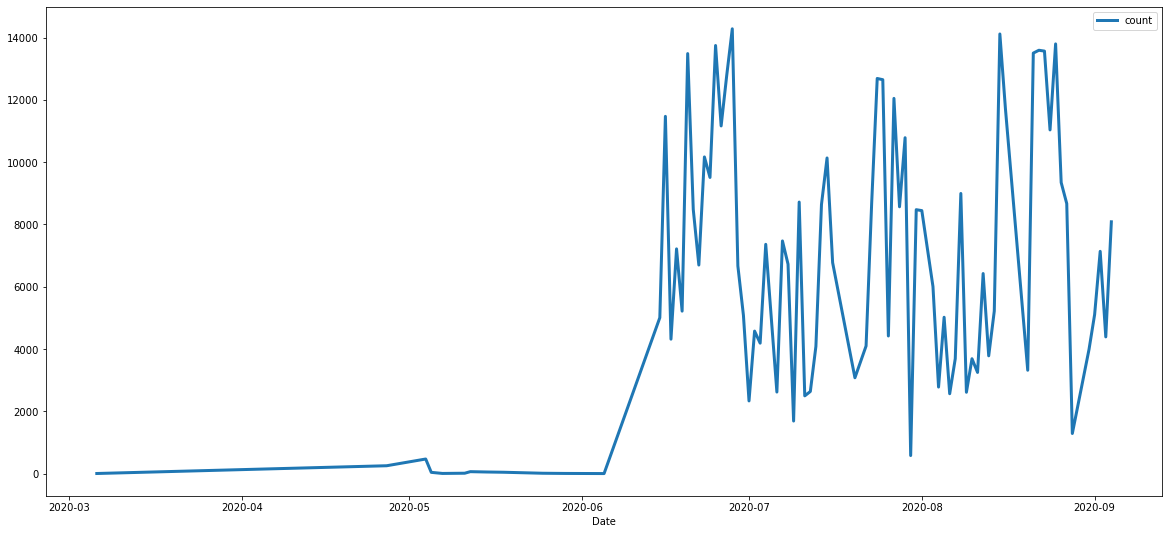

In [109]:
equipment_1_date_count1_11040.plot(figsize=(20,9), linewidth = 3)

In [105]:
equipment_1_date_count1_11040.sort_values('count')

,count
Date,
2020-06-05,1
2020-03-06,3
2020-05-07,5
2020-05-29,5
2020-05-25,11
2020-05-11,12
2020-05-05,40
2020-05-18,43
2020-05-15,51
